Fake News Classification with NLP

Project Flow:
1. Problem Statement
2. Data Gathering
3. Data Preprocessing :
   A. Tokenization
   B. Lower Case
   C. Stopwords
   D. Lemmatization / Stemming
4. Vectorization
   A. Bag of Words (CountVectorizer)
   B. TF- IDF
5. Model Building:
  A. Model Object Initialization
  B. Train and Test Model
6. Model Evaluation :
  A. Accuracy score
  B.Confusion Matrix
  C.Classification Report
7. Model Deployment:
8. Prediction on Client data

In [ ]:
###importations
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**Data Collection**


In [ ]:
!kaggle datasets download -d saurabhshahane/fake-news-classification

100% 92.0M/92.1M [00:05<00:00, 20.4MB/s]
100% 92.1M/92.1M [00:05<00:00, 17.4MB/s]


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
from zipfile import ZipFile
dataset = '/content/fake-news-classification.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [ ]:

csv_file_path = '/content/WELFake_Dataset.csv'

# Read the csv file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFr
df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
df['label'].value_counts()

1    37106
0    35028
Name: label, dtype: int64

In [ ]:
df.shape

(72134, 4)

In [ ]:
df.isna().sum()


Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
#drop missing values
df.dropna(inplace=True)



In [ ]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
df.shape

(71537, 4)

In [ ]:
df.reset_index(inplace = True)
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.head()

,index,id,title,text,label
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [ ]:
df.drop(['index','id','text'],axis =1,inplace = True)
df.head()

,title,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
2,"Bobby Jindal, raised Hindu, uses story of Chri...",0
3,SATAN 2: Russia unvelis an image of its terrif...,1
4,About Time! Christian Group Sues Amazon and SP...,1


In [ ]:
df = df.iloc[:35000]

In [ ]:
df.shape

(35000, 2)

Data Preprocessing

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

# Load stopwords
stopwords_list = set(stopwords.words('english'))


lm = WordNetLemmatizer()
corpus = []

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(x) for x in review if x not in stopwords_list]
    review = " ".join(review)
    corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Vectorization**


In [ ]:
tf = TfidfVectorizer()
X = tf.fit_transform(corpus).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Y = df['label']
Y.head()

0    1
1    1
2    0
3    1
4    1
Name: label, dtype: int64

**Data splitting into train and test**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

**Model Building**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

**Model Evaluation**

In [ ]:
Y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

class Evaluation:
    def __init__(self, model, X_train, X_test, Y_train, Y_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test

    def train_evaluation(self):
        Y_pred_train = self.model.predict(self.X_train)

        acc_scr_train = accuracy_score(self.Y_train, Y_pred_train)
        print("Accuracy Score on Training dataset: ", acc_scr_train)

        con_mat_train = confusion_matrix(self.Y_train, Y_pred_train)
        plt.figure(figsize=(8, 6))
        sns.heatmap(con_mat_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.xlabel('Predicted')
        plt.ylabel('Trained')
        plt.title('Confusion Matrix on Training dataset')
        plt.show()

        class_rep_train = classification_report(self.Y_train, Y_pred_train, output_dict=True)
        plt.figure(figsize=(10, 6))
        sns.heatmap(pd.DataFrame(class_rep_train).iloc[:-1, :].T, annot=True, cmap="Blues")
        plt.title("Classification Report")
        plt.show()

    def test_evaluation(self):
        Y_pred_test = self.model.predict(self.X_test)

        acc_scr_test = accuracy_score(self.Y_test, Y_pred_test)
        print("Accuracy Score on Testing dataset: ", acc_scr_test)

        con_mat_test = confusion_matrix(self.Y_test, Y_pred_test)
        plt.figure(figsize=(8, 6))
        sns.heatmap(con_mat_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix on Testing dataset')
        plt.show()

        class_rep_test = classification_report(self.Y_test, Y_pred_test, output_dict=True)
        plt.figure(figsize=(10, 6))
        sns.heatmap(pd.DataFrame(class_rep_test).iloc[:-1, :].T, annot=True, cmap="Blues")
        plt.title("Classification Report")
        plt.show()


Accuracy Score on Training dataset:  0.9998367346938776


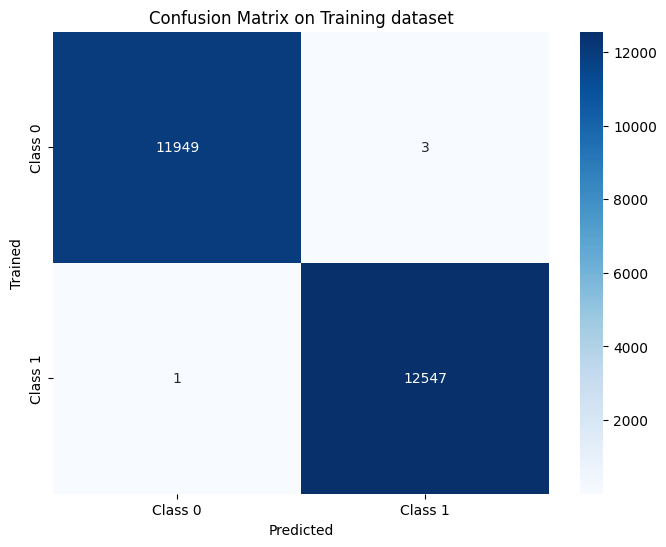

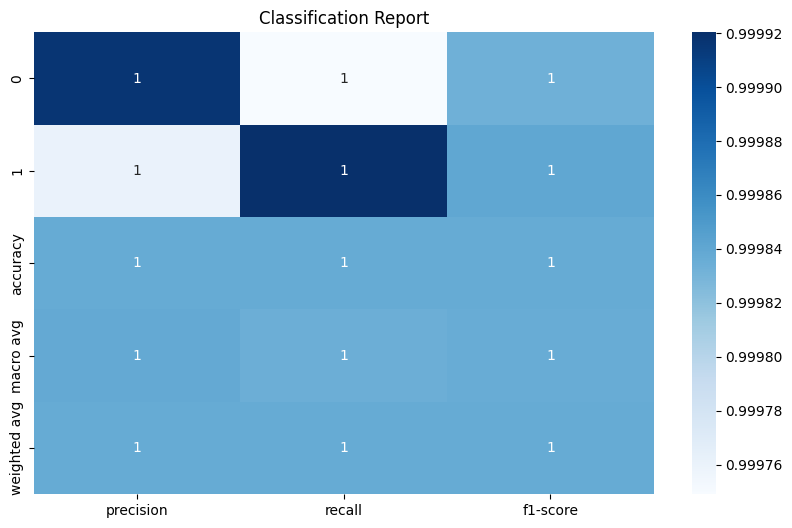

In [ ]:
Evaluation(rf, X_train, X_test, Y_train, Y_test).train_evaluation()

Accuracy Score on Testing dataset:  0.8804761904761905


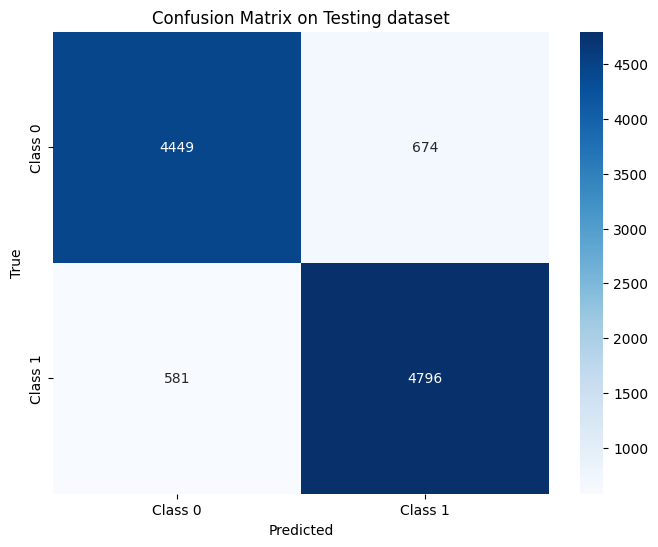

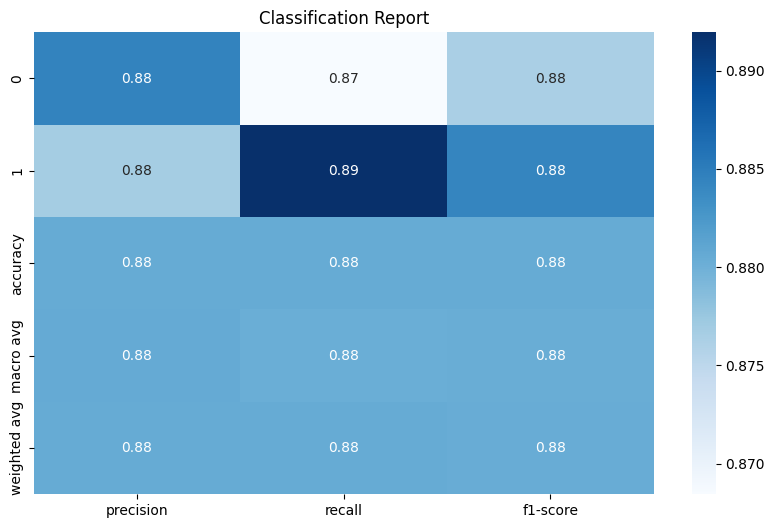

In [ ]:
Evaluation(rf, X_train, X_test, Y_train, Y_test).test_evaluation()

**Prediction Piple Line**

In [ ]:
class Preprocessing:
  def __init__(self,data):
    self.data = data
  def text_preprocessing_user(self):
    lm = WordNetLemmatizer()
    pred_data = [self.data]
    preprocess_data = []
    for data in pred_data:
        review = re.sub('[^a-zA-z0-Z9]', ' ', data)
        review = review.lower()
        review = review.split()
        review = [lm.lemmatize(x) for x in review if x not in stopwords_list]
        review = " ".join(review)
        preprocess_data.append(review)
    return preprocess_data

In [ ]:
class Prediction:
  def __init__(self,pred_data,model):
    self.pred_data = pred_data
    self.model = model
  def prediction_model(self):
    preprocess_data = Preprocessing(self.pred_data).text_preprocessing_user()
    data = tf.transform(preprocess_data)
    prediction = self.model.predict(data)

    if prediction [0] == 1:
      return "Fake News"
    else:
      return "The News is Real"

In [ ]:
df['title'][1]

'UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]'

In [ ]:
data = df['title'][1]
Preprocessing(data).text_preprocessing_user()

['unbelievable obama attorney general say charlotte rioter peaceful protester home state north carolina [video]']

In [ ]:
Prediction(data,rf).prediction_model()

'Fake News'

In [ ]:
data = df['title'][18]
Preprocessing(data).text_preprocessing_user()
Prediction(data,rf).prediction_model()

'The News is Real'